## Importing Libraries

In [1]:
# Import necessary libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
from sklearn.metrics import r2_score

In [2]:
# Supress Warnings

import warnings
warnings.filterwarnings('ignore')

## Reading and Understanding the Data

In [3]:
# Read the data from csv file

df = pd.read_csv('day.csv')

In [4]:
# Check the head of the dataset
 
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [5]:
# checking the shape of dataframe

df.shape

(730, 16)

In [6]:
# describing the columns of dataframe

df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [7]:
# get the info about columns

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [8]:
# checking for the null values in column data

df.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

##### Findings : 
There are no missing or null values in the data

In [9]:
# Find duplicate Data
# Checking for duplicates and dropping the entire duplicate row if any
df.drop_duplicates(subset=None, inplace=True)

In [10]:
df.shape

(730, 16)

##### Findings : 
The dataframe shape is same as previouse. It means there is no duplicate record present .
The dataframe is same same as previous after the duplicate check.


## Data Cleaning

#### Drop Columns that are not useful for our analysis based on Data Dictionary

1) instant: record index : This will not be useful as it is just a row identifier

2) dteday : date : As we already have year and month separate columns ,this will not be useful for our analysis

3) casual: count of casual users/ registered: count of registered users : These 2 columns provide customer categories, However our requirement is to provide analysis using 'cnt' as the target variable and not specifying any customer types


In [11]:
bike = df[['season','yr','mnth','holiday','weekday','workingday','weathersit','temp','atemp','hum','windspeed','cnt']]

In [12]:
bike.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600


In [13]:
#checking the shape of the new dataframe
bike.shape

(730, 12)

In [14]:
bike.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    int64  
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    int64  
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    int64  
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    int64  
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
dtypes: float64(4), int64(8)
memory usage: 74.1 KB


In [15]:
### Rename the columns for better understanding
bike.rename(columns = {'yr':'year', 'mnth':'month',
                              'hum':'humidity'}, inplace = True)

In [16]:
bike.head()

,season,year,month,holiday,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,cnt
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600


##### Findings : 
we can see that features like season, month, weekday and weathersit are integers although they should be non-numerical categories.

In [17]:
#Convert above features to categorical based on Data Dictionary
bike.season.replace({1:"spring", 2:"summer", 3:"fall", 4:"winter"},inplace = True)

bike.weathersit.replace({1:'clear',2:'cloudy',3:'rainy',4:'thunderstorm'},inplace = True)

bike.month = bike.month.replace({1: 'jan',2: 'feb',3: 'mar',4: 'apr',5: 'may',6: 'jun',
                  7: 'jul',8: 'aug',9: 'sept',10: 'oct',11: 'nov',12: 'dec'})

bike.weekday = bike.weekday.replace({0: 'sun',1: 'mon',2: 'tue',3: 'wed',4: 'thu',5: 'fri',6: 'sat'})
bike.head()

,season,year,month,holiday,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,cnt
0,spring,0,jan,0,sat,0,cloudy,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,jan,0,sun,0,cloudy,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,jan,0,mon,1,clear,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,jan,0,tue,1,clear,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,jan,0,wed,1,clear,9.305237,11.46350,43.6957,12.522300,1600


## Visualising the Data


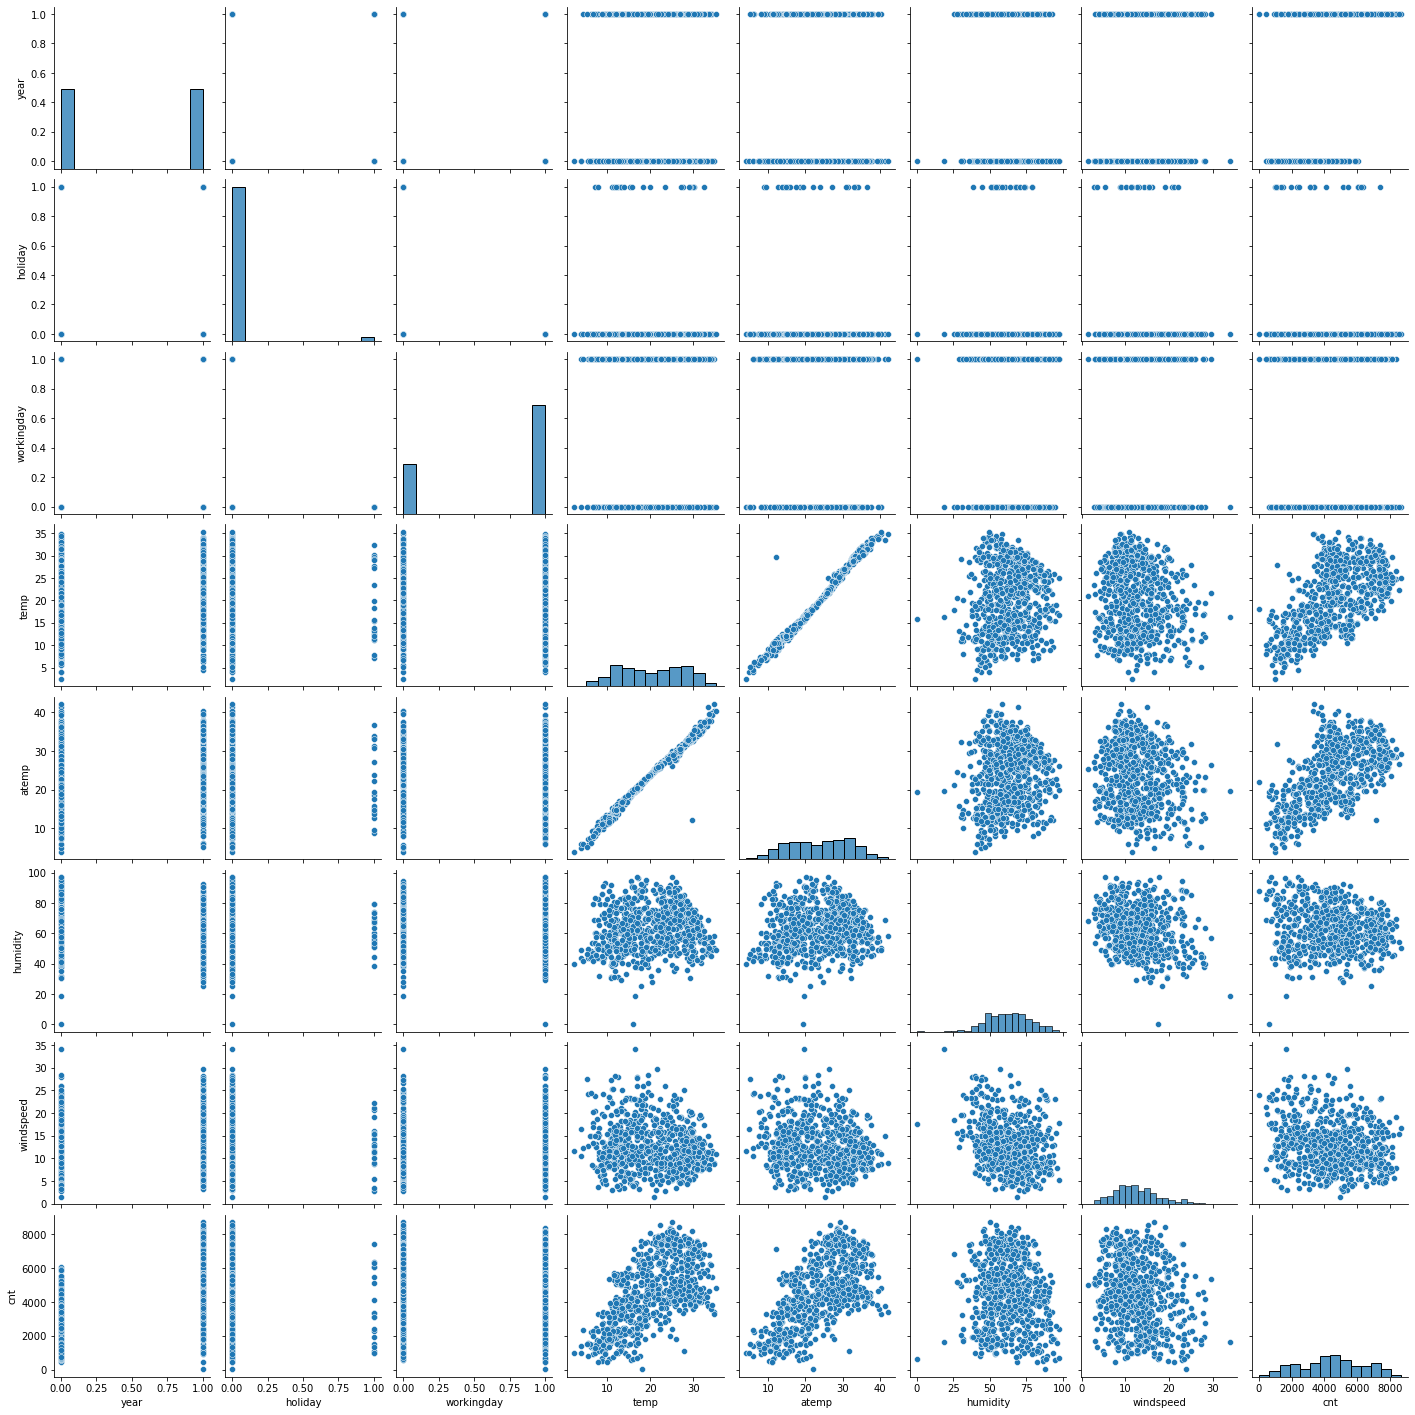

In [18]:
# Lets make pariplot for all the numeric variables
sns.pairplot(bike)
plt.show()

##### Findings : 
    temp and atemp are co-related with cnt.
    temp and atemp are co-related with eachother as well

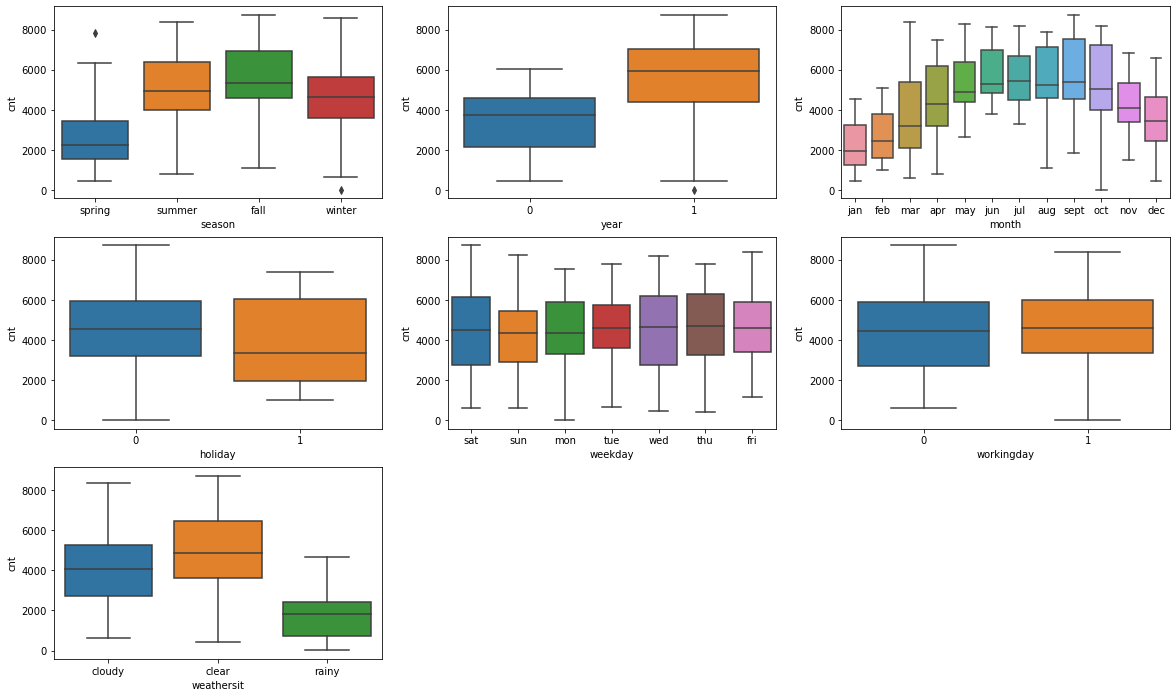

In [19]:
# Visualising Categorical Variables
# Let's make a boxplot for Categorical variables.

plt.figure(figsize=(20, 12))
plt.subplot(3,3,1)
sns.boxplot(x = 'season', y = 'cnt', data = bike)
plt.subplot(3,3,2)
sns.boxplot(x = 'year', y = 'cnt', data = bike)
plt.subplot(3,3,3)
sns.boxplot(x = 'month', y = 'cnt', data = bike)
plt.subplot(3,3,4)
sns.boxplot(x = 'holiday', y = 'cnt', data = bike)
plt.subplot(3,3,5)
sns.boxplot(x = 'weekday', y = 'cnt', data = bike)
plt.subplot(3,3,6)
sns.boxplot(x = 'workingday', y = 'cnt', data = bike)
plt.subplot(3,3,7)
sns.boxplot(x = 'weathersit', y = 'cnt', data = bike)
plt.show()

##### Findings : 
    Season : summer i.e. 3 has highest demand
    Year : 1 i.e. 2019 has more demand
    Demand continously increases month by month from January to June and  September month has highest demand. 
    Year end and begining has less demand
    Clear weathersit has highest demand and during Rainy its the lowest

## Data Preparation

### Create Dummy Variables

In [20]:
# Get dummy variables for the feature 
# drop_first = true because n-1 dummies can expain n categories 
bike=pd.get_dummies(data=bike, columns=["season","month","weekday","weathersit"], drop_first = True)

In [21]:
# check data after dummies
bike.head()

,year,holiday,workingday,temp,atemp,humidity,windspeed,cnt,season_spring,season_summer,...,month_oct,month_sept,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_cloudy,weathersit_rainy
0,0,0,0,14.110847,18.18125,80.5833,10.749882,985,1,0,...,0,0,0,1,0,0,0,0,1,0
1,0,0,0,14.902598,17.68695,69.6087,16.652113,801,1,0,...,0,0,0,0,1,0,0,0,1,0
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,1,0,...,0,0,1,0,0,0,0,0,0,0
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,1,0,...,0,0,0,0,0,0,1,0,0,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,1,0,...,0,0,0,0,0,0,0,1,0,0


In [22]:
# check the column names
bike.columns

Index(['year', 'holiday', 'workingday', 'temp', 'atemp', 'humidity',
       'windspeed', 'cnt', 'season_spring', 'season_summer', 'season_winter',
       'month_aug', 'month_dec', 'month_feb', 'month_jan', 'month_jul',
       'month_jun', 'month_mar', 'month_may', 'month_nov', 'month_oct',
       'month_sept', 'weekday_mon', 'weekday_sat', 'weekday_sun',
       'weekday_thu', 'weekday_tue', 'weekday_wed', 'weathersit_cloudy',
       'weathersit_rainy'],
      dtype='object')

In [23]:
bike.shape

(730, 30)

## Splitting the Data into Training and Testing Sets


In [24]:
# Perform train-test split for regression

#y to contain only target variable
y=bike.pop('cnt')

#X is all remaining variables
X=bike

#Train Test split with 70:30 ratio
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=400)

In [25]:
# Checking shape for train and test
print(X_train.shape)
print(X_test.shape)

(511, 29)
(219, 29)


### Rescaling the Features

In [26]:
# This step is to rescale variable so that they have a comparable scale

# Apply scaler() to all the columns except the 'yes-no/0-1' and 'dummy' variables
num_vars = ['temp','atemp','humidity','windspeed']

#Use Normalized scaler to scale
scaler = MinMaxScaler()

#Fit and transform training set only
X_train[num_vars] = scaler.fit_transform(X_train[num_vars])

In [27]:
X_train.head()

,year,holiday,workingday,temp,atemp,humidity,windspeed,season_spring,season_summer,season_winter,...,month_oct,month_sept,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_cloudy,weathersit_rainy
205,0,0,1,0.866039,0.858942,0.700115,0.171091,0,0,0,...,0,0,1,0,0,0,0,0,0,0
351,0,0,0,0.226828,0.222814,0.462297,0.368576,0,0,1,...,0,0,0,0,1,0,0,0,0,0
660,1,0,1,0.613942,0.603818,0.539443,0.180438,0,0,1,...,1,0,0,0,0,0,1,0,0,0
265,0,0,1,0.696217,0.592874,1.000000,0.139978,0,0,1,...,0,1,0,0,0,0,0,0,1,0
27,0,0,1,0.182710,0.193024,0.750176,0.252344,1,0,0,...,0,0,0,0,0,0,0,0,1,0


In [28]:
X_train.describe()

,year,holiday,workingday,temp,atemp,humidity,windspeed,season_spring,season_summer,season_winter,...,month_oct,month_sept,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_cloudy,weathersit_rainy
count,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,...,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000
mean,0.495108,0.027397,0.677104,0.559946,0.536155,0.522249,0.413248,0.236791,0.258317,0.234834,...,0.084149,0.080235,0.144814,0.148728,0.146771,0.135029,0.146771,0.146771,0.326810,0.031311
std,0.500466,0.163398,0.468042,0.233879,0.220014,0.194074,0.195527,0.425529,0.438138,0.424310,...,0.277883,0.271923,0.352258,0.356169,0.354224,0.342090,0.354224,0.354224,0.469507,0.174328
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.357625,0.349515,0.370069,0.272168,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,0.584407,0.570020,0.519721,0.390342,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.761086,0.714927,0.663573,0.530846,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## Build Linear Regression Model Automated Approach


In [29]:
lr = LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [30]:
# Use RFE to eliminate some columns
# Lets take top 15 features to build the model and drop columns based for manual approach
rfe = RFE(lr,n_features_to_select=15)
rfe.fit(X_train,y_train)


RFE(estimator=LinearRegression(), n_features_to_select=15)

In [31]:
# Lets check the columns selected by RFE
list(zip(X_train.columns,rfe.support_,rfe.ranking_))


[('year', True, 1),
 ('holiday', False, 5),
 ('workingday', False, 2),
 ('temp', True, 1),
 ('atemp', True, 1),
 ('humidity', True, 1),
 ('windspeed', True, 1),
 ('season_spring', True, 1),
 ('season_summer', False, 6),
 ('season_winter', True, 1),
 ('month_aug', False, 10),
 ('month_dec', True, 1),
 ('month_feb', True, 1),
 ('month_jan', True, 1),
 ('month_jul', True, 1),
 ('month_jun', False, 11),
 ('month_mar', False, 8),
 ('month_may', False, 4),
 ('month_nov', True, 1),
 ('month_oct', False, 7),
 ('month_sept', False, 3),
 ('weekday_mon', False, 12),
 ('weekday_sat', True, 1),
 ('weekday_sun', False, 9),
 ('weekday_thu', False, 15),
 ('weekday_tue', False, 13),
 ('weekday_wed', False, 14),
 ('weathersit_cloudy', True, 1),
 ('weathersit_rainy', True, 1)]

In [32]:
# Columns selected by RFE
X_train.columns[rfe.support_]

Index(['year', 'temp', 'atemp', 'humidity', 'windspeed', 'season_spring',
       'season_winter', 'month_dec', 'month_feb', 'month_jan', 'month_jul',
       'month_nov', 'weekday_sat', 'weathersit_cloudy', 'weathersit_rainy'],
      dtype='object')

In [33]:
# Columns selected by RFE
X_train.columns[~rfe.support_]

Index(['holiday', 'workingday', 'season_summer', 'month_aug', 'month_jun',
       'month_mar', 'month_may', 'month_oct', 'month_sept', 'weekday_mon',
       'weekday_sun', 'weekday_thu', 'weekday_tue', 'weekday_wed'],
      dtype='object')

## Model 1 : All RFE Selcted Columns

In [34]:
### Reusable funtions for model creation and printing summary
def lr_model(X_train):
    X_train_lm = sm.add_constant(X_train)
    lm = sm.OLS(y_train, X_train_lm).fit()
    print(lm.params)
    print(lm.summary())
    return lm

In [35]:
### Reusable funtions for VIF
def vif(X_train):
    df1 = X_train
    vif = pd.DataFrame()
    vif['Features'] = df1.columns
    vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(df1.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return vif

In [36]:
lr_model(X_train[X_train.columns[rfe.support_]])
vif(X_train[X_train.columns[rfe.support_]])

const                2906.864504
year                 2070.865045
temp                 2328.567998
atemp                1387.166865
humidity             -994.356817
windspeed           -1206.570575
season_spring        -810.128285
season_winter         740.234341
month_dec            -608.026513
month_feb            -473.708568
month_jan            -591.782808
month_jul            -573.740960
month_nov            -845.808557
weekday_sat           234.705788
weathersit_cloudy    -409.375912
weathersit_rainy    -1739.158488
dtype: float64
                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.840
Model:                            OLS   Adj. R-squared:                  0.835
Method:                 Least Squares   F-statistic:                     172.6
Date:                Mon, 07 Nov 2022   Prob (F-statistic):          1.51e-185
Time:                        22:09:57   Log-Likelihood:       

,Features,VIF
2,atemp,358.94
1,temp,356.95
3,humidity,14.39
4,windspeed,4.98
5,season_spring,4.20
6,season_winter,2.66
13,weathersit_cloudy,2.30
9,month_jan,2.26
8,month_feb,2.05
0,year,2.03


## Model 2 

In [37]:
# Removing the variable 'atemp' based on its Very High P- value.

In [38]:
X_train_model2 = X_train[X_train.columns[rfe.support_]].drop(["atemp"], axis = 1)
lr_model(X_train_model2)
vif(X_train_model2)

const                2946.563584
year                 2069.528500
temp                 3593.646803
humidity             -964.715394
windspeed           -1244.176393
season_spring        -811.833291
season_winter         743.833202
month_dec            -610.075498
month_feb            -480.765824
month_jan            -607.776156
month_jul            -564.871655
month_nov            -848.540168
weekday_sat           236.228844
weathersit_cloudy    -415.145859
weathersit_rainy    -1767.551473
dtype: float64
                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.839
Model:                            OLS   Adj. R-squared:                  0.835
Method:                 Least Squares   F-statistic:                     184.7
Date:                Mon, 07 Nov 2022   Prob (F-statistic):          2.20e-186
Time:                        22:09:57   Log-Likelihood:                -4132.5
No. Observations

,Features,VIF
2,humidity,14.03
1,temp,12.82
3,windspeed,4.93
4,season_spring,4.19
5,season_winter,2.64
12,weathersit_cloudy,2.29
8,month_jan,2.26
7,month_feb,2.05
0,year,2.03
10,month_nov,1.68


##### Findings : 
    The R2 and Adjusted R2 has no major impact after removing humidity

## Model 3 

In [39]:
# Removing the variable 'humidity' based on high VIF.
X_train_model3 = X_train_model2.drop(["humidity"], axis = 1)
lr_model(X_train_model3)
vif(X_train_model3)

const                2569.479799
year                 2114.833122
temp                 3334.905029
windspeed           -1024.808775
season_spring        -844.213697
season_winter         687.492302
month_dec            -645.466863
month_feb            -469.640053
month_jan            -613.530980
month_jul            -483.455782
month_nov            -839.243973
weekday_sat           248.382113
weathersit_cloudy    -616.048202
weathersit_rainy    -2229.200538
dtype: float64
                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.835
Model:                            OLS   Adj. R-squared:                  0.830
Method:                 Least Squares   F-statistic:                     192.8
Date:                Mon, 07 Nov 2022   Prob (F-statistic):          1.43e-184
Time:                        22:09:57   Log-Likelihood:                -4139.6
No. Observations:                 511   AIC:     

,Features,VIF
2,windspeed,4.86
1,temp,4.84
3,season_spring,3.96
4,season_winter,2.41
7,month_jan,2.21
6,month_feb,2.04
0,year,2.00
9,month_nov,1.67
5,month_dec,1.59
11,weathersit_cloudy,1.48


##### Findings : 
    The R2 and Adjusted R2 has no major impact after removing humidity

## Model 4 

In [40]:
# Removing the variable 'weekday_sat' based on P-value.
X_train_model4 = X_train_model3.drop(["weekday_sat"], axis = 1)
lr_model(X_train_model4)
vif(X_train_model4)

const                2628.982611
year                 2115.445086
temp                 3282.628889
windspeed            -995.271662
season_spring        -868.540711
season_winter         678.368174
month_dec            -646.131479
month_feb            -470.094442
month_jan            -609.026236
month_jul            -464.491684
month_nov            -835.536405
weathersit_cloudy    -617.414700
weathersit_rainy    -2212.621248
dtype: float64
                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.833
Model:                            OLS   Adj. R-squared:                  0.829
Method:                 Least Squares   F-statistic:                     206.3
Date:                Mon, 07 Nov 2022   Prob (F-statistic):          1.90e-184
Time:                        22:09:57   Log-Likelihood:                -4142.7
No. Observations:                 511   AIC:                             8311.
Df 

,Features,VIF
1,temp,4.83
2,windspeed,4.79
3,season_spring,3.96
4,season_winter,2.41
7,month_jan,2.20
6,month_feb,2.04
0,year,2.00
9,month_nov,1.67
5,month_dec,1.59
10,weathersit_cloudy,1.48


##### Findings : 
    The R2 and Adjusted R2 has no major impact after removing humidity

## Model 5

In [41]:
# Removing the variable 'month_feb' based on P-value.
X_train_model5 = X_train_model4.drop(["month_feb"], axis = 1)
lr_model(X_train_model5)
vif(X_train_model5)

const                2507.562843
year                 2110.566422
temp                 3440.968068
windspeed            -966.315517
season_spring       -1057.314164
season_winter         668.424218
month_dec            -523.563199
month_jan            -344.648825
month_jul            -490.881093
month_nov            -776.042354
weathersit_cloudy    -613.689826
weathersit_rainy    -2205.534782
dtype: float64
                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.831
Model:                            OLS   Adj. R-squared:                  0.827
Method:                 Least Squares   F-statistic:                     222.4
Date:                Mon, 07 Nov 2022   Prob (F-statistic):          2.18e-184
Time:                        22:09:57   Log-Likelihood:                -4145.6
No. Observations:                 511   AIC:                             8315.
Df Residuals:                     49

,Features,VIF
1,temp,4.79
2,windspeed,4.78
4,season_winter,2.36
3,season_spring,2.30
0,year,2.00
8,month_nov,1.66
6,month_jan,1.59
9,weathersit_cloudy,1.48
5,month_dec,1.47
7,month_jul,1.29


##### Findings : 
    The R2 and Adjusted R2 has no major impact after removing humidity

## Model 6

In [42]:
# Removing the variable 'month_jan' based on P-value.
X_train_model6 = X_train_model5.drop(["month_jan"], axis = 1)
lr_model(X_train_model6)
vif(X_train_model6)

const                2376.876541
year                 2108.795606
temp                 3605.001342
windspeed            -923.795591
season_spring       -1122.832215
season_winter         679.763539
month_dec            -450.568511
month_jul            -518.256763
month_nov            -736.157218
weathersit_cloudy    -615.803605
weathersit_rainy    -2199.671191
dtype: float64
                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.829
Model:                            OLS   Adj. R-squared:                  0.826
Method:                 Least Squares   F-statistic:                     242.6
Date:                Mon, 07 Nov 2022   Prob (F-statistic):          1.18e-184
Time:                        22:09:57   Log-Likelihood:                -4147.8
No. Observations:                 511   AIC:                             8318.
Df Residuals:                     500   BIC:                         

,Features,VIF
2,windspeed,4.78
1,temp,4.75
4,season_winter,2.34
0,year,1.99
3,season_spring,1.71
7,month_nov,1.65
8,weathersit_cloudy,1.47
5,month_dec,1.43
6,month_jul,1.29
9,weathersit_rainy,1.09


## Model 7

In [43]:
# Removing the variable 'month_dec' based on P-value.
X_train_model7 = X_train_model6.drop(["month_dec"], axis = 1)
lr7 = lr_model(X_train_model7)
vif(X_train_model7)

const                2236.977207
year                 2117.272041
temp                 3784.079499
windspeed            -900.135637
season_spring       -1105.314348
season_winter         551.391208
month_jul            -549.379856
month_nov            -552.362853
weathersit_cloudy    -614.131581
weathersit_rainy    -2182.017527
dtype: float64
                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.826
Model:                            OLS   Adj. R-squared:                  0.823
Method:                 Least Squares   F-statistic:                     264.3
Date:                Mon, 07 Nov 2022   Prob (F-statistic):          6.37e-184
Time:                        22:09:57   Log-Likelihood:                -4152.5
No. Observations:                 511   AIC:                             8325.
Df Residuals:                     501   BIC:                             8367.
Df Model:              

,Features,VIF
2,windspeed,4.76
1,temp,4.73
0,year,1.99
4,season_winter,1.79
3,season_spring,1.67
6,month_nov,1.48
7,weathersit_cloudy,1.47
5,month_jul,1.29
8,weathersit_rainy,1.09


##### Findings : 
    VIF for the Features are less then 5 and the p-value for all the predictors are also seems to be significant.
    Hence  we will consider this as our final model and very with the test data and determine if any further changes are required to the model

## Residual Analysis of the train data

In [44]:
X_train_model7=sm.add_constant(X_train_model7)
y_train_pred = lr7.predict(X_train_model7)

Text(0.5, 0, 'Errors')

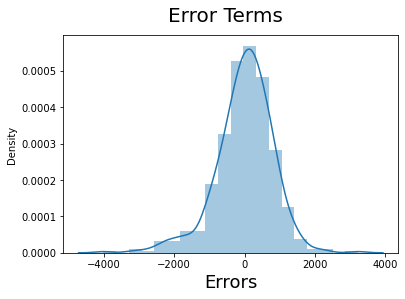

In [45]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_pred), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label


##### Findings : 
    From the above chart, we can see that errors are normally distributed and the mean is zero. 

In [46]:
## Check Multicollinearity between the predictor variables

## Making Prediction using Final Model

#### Applying the scaling on the test sets

In [47]:
# Apply scaler() to all the columns except the 'yes-no/0-1' and 'dummy' variables
num_vars = ['temp','atemp','humidity','windspeed']

#Test data to be transformed only, no fitting
X_test[num_vars] = scaler.transform(X_test[num_vars])

In [48]:
X_test.head()

,year,holiday,workingday,temp,atemp,humidity,windspeed,season_spring,season_summer,season_winter,...,month_oct,month_sept,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_cloudy,weathersit_rainy
480,1,0,1,0.555927,0.541299,0.699536,0.385696,0,1,0,...,0,0,0,0,0,1,0,0,1,0
324,0,0,1,0.491584,0.489752,0.912993,0.289240,0,0,1,...,0,0,1,0,0,0,0,0,0,1
79,0,0,1,0.469984,0.442479,0.672702,0.666173,0,1,0,...,0,0,1,0,0,0,0,0,1,0
465,1,0,1,0.366522,0.345516,0.299858,0.682405,0,1,0,...,0,0,0,0,0,0,0,1,0,0
274,0,0,0,0.376611,0.356278,0.748260,0.499199,0,0,1,...,1,0,0,0,1,0,0,0,1,0


In [49]:
X_test.describe()

,year,holiday,workingday,temp,atemp,humidity,windspeed,season_spring,season_summer,season_winter,...,month_oct,month_sept,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_cloudy,weathersit_rainy
count,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,...,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000
mean,0.511416,0.031963,0.698630,0.534984,0.512905,0.514528,0.437081,0.269406,0.237443,0.264840,...,0.086758,0.086758,0.141553,0.132420,0.136986,0.159817,0.132420,0.127854,0.360731,0.022831
std,0.501015,0.176306,0.459904,0.226267,0.213266,0.207876,0.189548,0.444668,0.426491,0.442259,...,0.282125,0.282125,0.349389,0.339723,0.344621,0.367276,0.339723,0.334692,0.481313,0.149707
min,0.000000,0.000000,0.000000,0.047329,0.026455,-0.353829,0.060663,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.333892,0.330516,0.372049,0.310258,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.511625,0.505788,0.513341,0.409015,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.729970,0.689998,0.661253,0.523308,1.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.015822,1.019437,0.968097,1.213032,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [50]:
#Columns from our final model
#cols = X_train_model7.columns
cols = ['year', 'temp', 'windspeed', 'season_spring', 'season_winter',
       'month_jul', 'month_nov', 'weathersit_cloudy', 'weathersit_rainy']

X_test_m7 = sm.add_constant(X_test[cols])

#Predict the values for test data
y_test_pred = lr7.predict(X_test_m7)

## Model Evaluation

Text(0, 0.5, 'y_pred')

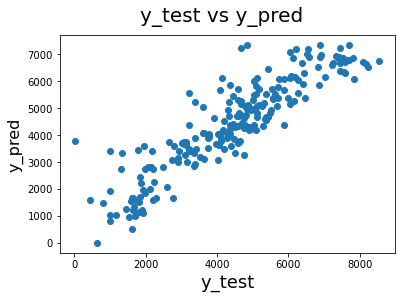

In [51]:
# Plotting y_test and y_pred to understand the spread

fig = plt.figure()
plt.scatter(y_test, y_test_pred)
fig.suptitle('y_test vs y_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_pred', fontsize = 16)      

In [52]:
# Find out the R squared value between test and predicted test data sets.  
r2_score(y_test,y_test_pred)

0.8064623712296991